# Texas

## Contents
- [Imports](#Data-Dictionary)
- [Regression Modeling](#Regression-Modeling)  
- [Classification Modeling](#Classification-Modeling)  

# Imports

In [1]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, confusion_matrix, plot_confusion_matrix, plot_roc_curve, f1_score, accuracy_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm  import SVR, SVC
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PowerTransformer, QuantileTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier 
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier

In [2]:
# Import the Texas data and sae to a dataframe.
df = pd.read_csv('../data/cleaned_engineered_tx.csv')

In [3]:
# Display the first few rows of the dataframe.
df.head(2)

,county_state,total_cases,total_fatalities,death_rate,total_tests,race_pop,race_pop_hispanic_or_latino_of_any_race,race_pop_white_alone,race_pop_black_or_african_american_alone,race_pop_american_indian_and_alaska_native_alone,...,percent_race_pop_other,percent_race_pop_minority,percent_sex_age_pop_0_to_44,percent_sex_age_pop_45_to_74,percent_sex_age_pop_75_and_over,percent_sex_age_pop_0_to_64,percent_sex_age_pop_65_and_over,percent_sex_age_pop_0_to_35,percent_sex_age_pop_35_to_59,percent_sex_age_pop_60_to_84
0,"Anderson County, Texas",2941.0,39.0,0.013261,30052,57863,10142,34312,12127,158,...,0.016643,0.407013,0.597619,0.344659,0.057723,0.858303,0.141697,0.426438,0.369684,0.189033
1,"Andrews County, Texas",584.0,10.0,0.017123,2127,17818,9979,7215,321,0,...,0.013470,0.595072,0.678022,0.277079,0.044898,0.896565,0.103435,0.554944,0.293299,0.138455


# Regression Modeling

## Explainable Model: GridSearchCV with Power, SelectKBest, Ridge: 43%

This model drops some outliers.

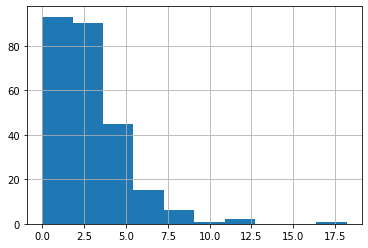

In [9]:
# Display histogram of deaths per 100 cases for Texas.
df['deaths_per_100_cases'].hist();

In [10]:
# Display outliers for deaths per 100 cases.
df[df['deaths_per_100_cases'] > 10]

,county_state,total_cases,total_fatalities,death_rate,total_tests,race_pop,race_pop_hispanic_or_latino_of_any_race,race_pop_white_alone,race_pop_black_or_african_american_alone,race_pop_american_indian_and_alaska_native_alone,...,percent_race_pop_other,percent_race_pop_minority,percent_sex_age_pop_0_to_44,percent_sex_age_pop_45_to_74,percent_sex_age_pop_75_and_over,percent_sex_age_pop_0_to_64,percent_sex_age_pop_65_and_over,percent_sex_age_pop_0_to_35,percent_sex_age_pop_35_to_59,percent_sex_age_pop_60_to_84
130,"Kenedy County, Texas",11.0,2.0,0.181818,86,595,522,72,0,0,...,0.000000,0.878992,0.544538,0.369748,0.085714,0.771429,0.228571,0.465546,0.290756,0.206723
223,"Throckmorton County, Texas",17.0,2.0,0.117647,118,1567,235,1292,16,0,...,0.015316,0.175495,0.467773,0.415444,0.116784,0.751117,0.248883,0.393108,0.275048,0.305680
230,"Upton County, Texas",27.0,3.0,0.111111,536,3634,1837,1525,237,5,...,0.002752,0.580352,0.604568,0.329664,0.065768,0.849752,0.150248,0.479086,0.316731,0.187672


In [11]:
df = df[df['deaths_per_100_cases'] < 10]

In [343]:
# Assign our features to X.
X = df[[
    'inc_per_capita_inc_dol',
    'percent_health_ins_noninst_pop_cov_no',
    'percent_race_pop_white_alone',
    'percent_race_pop_minority',
    'percent_sex_age_pop_male',
    'percent_inc_hhlds_less_than_49_999',
    'percent_inc_hhlds_75_000_to_99_999',
    'sex_age_median_age_in_years',
    'percent_sex_age_pop_0_to_44',
    'percent_sex_age_pop_45_to_74',
    'percent_sex_age_pop_75_and_over',
    'obes_percent',
    'pop_density',
]]

y = df['cases_per_100_people']

# Split X and y into train/test groups.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [344]:
# Display the shape of the training data.
X_train.shape

(187, 13)

In [345]:
# Display the shape of the test data.
X_test.shape

(63, 13)

In [352]:
# Create a main pipeline that will contain the dtype pipelines and the estimator.
pipe = make_pipeline(PowerTransformer(), SelectKBest(f_regression), Ridge(max_iter=20_000))

# Set parameters for GridSearchCV.
params = {
    'selectkbest__k': range(1,14),
    'ridge__alpha': [1, 10, 20]
}

# Set up GridSearchCV with the pipe and R2 as the scoring method.
gs = GridSearchCV(pipe, param_grid=params, scoring='r2', cv=10, n_jobs=-1)

In [353]:
# Call fit on the GridSearchCV object and pass the training  data.
gs.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('powertransformer', PowerTransformer()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x7f62b1882cb0>)),
                                       ('ridge', Ridge(max_iter=20000))]),
             n_jobs=-1,
             param_grid={'ridge__alpha': [1, 10, 20],
                         'selectkbest__k': range(1, 14)},
             scoring='r2')

In [354]:
# Display the best parameters.
gs.best_params_

{'ridge__alpha': 10, 'selectkbest__k': 12}

In [355]:
# Display the score for the test set.
gs.score(X_test, y_test)

0.43032253221588257

In [356]:
# Display the score for the train set.
gs.score(X_train, y_train)

0.4523718943561972

In [357]:
# Calculate the RMSE for the model.
y_preds = gs.predict(X_test)
print('RMSE of Model:', mean_squared_error(y_test, y_preds, squared=False))

RMSE of Model: 1.1507571693977718


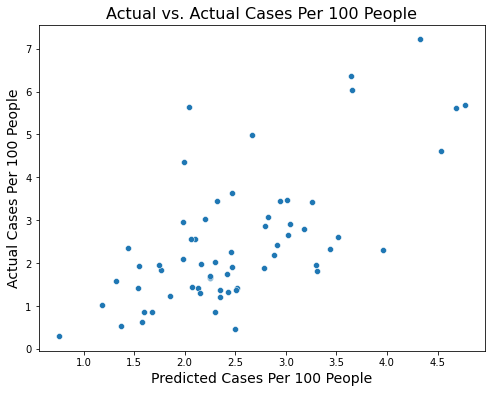

In [358]:
# Plot the predicted sale price versus the actual sale price
plt.figure(figsize=(8,6))
sns.scatterplot(y_preds, y_test)
plt.title('Actual vs. Actual Cases Per 100 People', fontsize=16)
plt.xlabel('Predicted Cases Per 100 People', fontsize=14)
plt.ylabel('Actual Cases Per 100 People', fontsize=14);

In [359]:
# Extract a boolean matrix of features selectkbest used in the best model.
features = gs.best_estimator_.named_steps['selectkbest'].get_support()
features

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True])

In [360]:
features = X_train.columns[features==True]

In [361]:
features

Index(['inc_per_capita_inc_dol', 'percent_health_ins_noninst_pop_cov_no',
       'percent_race_pop_white_alone', 'percent_race_pop_minority',
       'percent_sex_age_pop_male', 'percent_inc_hhlds_less_than_49_999',
       'percent_inc_hhlds_75_000_to_99_999', 'sex_age_median_age_in_years',
       'percent_sex_age_pop_0_to_44', 'percent_sex_age_pop_45_to_74',
       'percent_sex_age_pop_75_and_over', 'pop_density'],
      dtype='object')

In [362]:
# Extract the coefficients for the features used in the best model.
coefs = gs.best_estimator_.named_steps['ridge'].coef_

In [363]:
coefs.shape

(12,)

In [364]:
coefs

array([-0.36247894, -0.08467635, -0.27402339,  0.24972218,  0.08507163,
       -0.18672237, -0.25039104, -0.0834419 ,  0.01903078, -0.04913189,
        0.06561776,  0.26836031])

In [365]:
coef_df = pd.DataFrame(list(zip(features, coefs)), columns=['Feature', 'cases_per_100_people'])
coef_df = coef_df.set_index('Feature')
coef_df = coef_df.sort_values(by='cases_per_100_people', ascending=False)

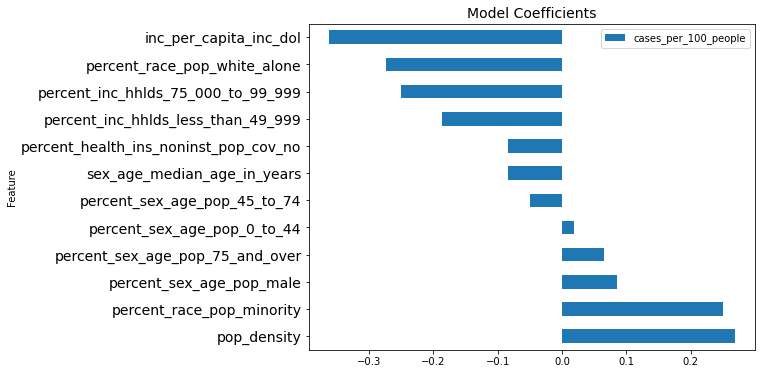

In [366]:
# Plot the datatframe of the top 10 word and their coefficients.
coef_df.plot(kind = 'barh', figsize=(8,6))
plt.title('Model Coefficients', fontsize=14)
plt.yticks(fontsize=14);

## Blackbox Model: Power, Polynomial, Gridsearch, Ridge: 49%

In [417]:
# Assign our features to X.
X = df[[
    'sex_age_median_age_in_years',
    'percent_race_pop_minority',
    'percent_race_pop_white_alone',
    'inc_per_capita_inc_dol',
    'percent_sex_age_pop_male',
    'percent_health_ins_noninst_pop_cov_no',
    'percent_inc_hhlds_less_than_10_000',
    'percent_inc_hhlds_75_000_to_99_999',
    'percent_inc_hhlds_less_than_49_999',
    'percent_race_pop_minority',
    'percent_sex_age_pop_0_to_44',
    'percent_sex_age_pop_45_to_74',
    'percent_sex_age_pop_75_and_over',
    'obes_percent',
    'pop_density',
]]

y = df['cases_per_100_people']

# Split X and y into train/test groups.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [418]:
# Display the shape of the training data.
X_train.shape

(187, 17)

In [419]:
# Create a main pipeline that will contain the dtype pipelines and the estimator.
pipe = make_pipeline(PowerTransformer(), PolynomialFeatures(), SelectKBest(f_regression), Ridge(max_iter=20_000))

# Set parameters for GridSearchCV.
params = {
    'selectkbest__k': range(1,300),
    'ridge__alpha': [1, 10, 20, 30, 100, 150, 200]
}

# Set up GridSearchCV with the pipe and R2 as the scoring method.
gs = GridSearchCV(pipe, param_grid=params, scoring='r2', cv=10, n_jobs=-1)

In [420]:
# Call fit on the GridSearchCV object and pass the training  data.
gs.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('powertransformer', PowerTransformer()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x7f62b1882cb0>)),
                                       ('ridge', Ridge(max_iter=20000))]),
             n_jobs=-1,
             param_grid={'ridge__alpha': [1, 10, 20, 30, 100, 150, 200],
                         'selectkbest__k': range(1, 300)},
             scoring='r2')

In [421]:
# Display the best parameters.
gs.best_params_

{'ridge__alpha': 100, 'selectkbest__k': 99}

In [422]:
# Display the score for the test set.
gs.score(X_test, y_test)

0.490834467505739

In [423]:
# Display the score for the train set.
gs.score(X_train, y_train)

0.5871049722404154

In [424]:
# Calculate the RMSE for the model.
y_preds = gs.predict(X_test)
print('RMSE of Model:', mean_squared_error(y_test, y_preds, squared=False))

RMSE of Model: 1.087924272993384


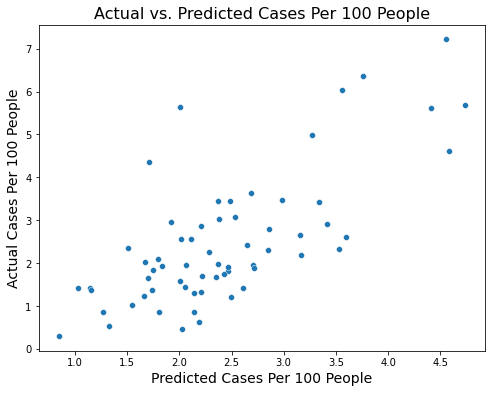

In [425]:
# Plot the predicted sale price versus the actual sale price
plt.figure(figsize=(8,6))
sns.scatterplot(y_preds, y_test)
plt.title('Actual vs. Predicted Cases Per 100 People', fontsize=16)
plt.xlabel('Predicted Cases Per 100 People', fontsize=14)
plt.ylabel('Actual Cases Per 100 People', fontsize=14);

# Classification Modeling

## Simple(r) Model: GridSearchCV with Classifier: 59% (baseline 39%)

In [426]:
# Assign our features to X.
X = df[[
    'sex_age_median_age_in_years',
    'percent_race_pop_minority',
    'percent_race_pop_white_alone',
    'inc_per_capita_inc_dol',
    'percent_sex_age_pop_male',
    'percent_health_ins_noninst_pop_cov_no',
    'percent_inc_hhlds_less_than_10_000',
    'percent_inc_hhlds_75_000_to_99_999',
    'percent_inc_hhlds_less_than_49_999',
    'percent_race_pop_minority',
    'percent_sex_age_pop_0_to_44',
    'percent_sex_age_pop_45_to_74',
    'percent_sex_age_pop_75_and_over',
    'obes_percent',
    'pop_density',
]]

y = df['covid_severity']

# Split X and y into train/test groups.
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [427]:
y_test.value_counts(normalize=True)

1    0.396825
3    0.301587
2    0.301587
Name: covid_severity, dtype: float64

In [428]:
# Display the shape of the training data.
X_train.shape

(187, 15)

In [429]:
X_test.shape

(63, 15)

In [430]:
# Create a main pipeline that will contain the dtype pipelines and the estimator.
pipe = make_pipeline(QuantileTransformer(), SelectKBest(), LogisticRegression())

# Set parameters for GridSearchCV.
params = {
    'selectkbest__k': range(1,21),
    'logisticregression__C': [.1, .5, 1, 10]
}

# Set up GridSearchCV with the pipe and R2 as the scoring method.
gs = GridSearchCV(pipe, param_grid=params, cv=10, n_jobs=-1)

In [431]:
# Call fit on the GridSearchCV object and pass the training  data.
gs.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('quantiletransformer',
                                        QuantileTransformer()),
                                       ('selectkbest', SelectKBest()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.1, 0.5, 1, 10],
                         'selectkbest__k': range(1, 21)})

In [432]:
# Display the best parameters.
gs.best_params_

{'logisticregression__C': 10, 'selectkbest__k': 1}

In [433]:
# Display the score for the test set.
gs.score(X_test, y_test)

0.5873015873015873

In [434]:
y_test.value_counts(normalize=True)

1    0.396825
3    0.301587
2    0.301587
Name: covid_severity, dtype: float64

In [435]:
# Display the score for the train set.
gs.score(X_train, y_train)

0.5989304812834224

In [436]:
y_preds = gs.predict(X_test)

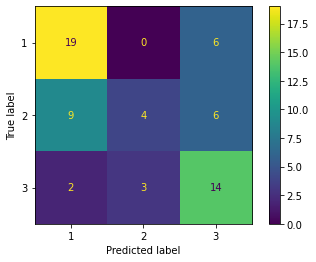

In [437]:
# Plot the predicted sale price versus the actual sale price
plot_confusion_matrix(gs, X_test, y_test);

In [438]:
# Extract a boolean matrix of features selectkbest used in the best model.
features = gs.best_estimator_.named_steps['selectkbest'].get_support()
features

array([False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [439]:
features = X_train.columns[features==True]

In [440]:
# Extract the coefficients for the features used in the best model.
coefs = gs.best_estimator_.named_steps['logisticregression'].coef_

In [441]:
coefs.shape

(3, 1)

In [442]:
coef1 = coefs[0]
coef2 = coefs[1]
coef3 = coefs[2]

In [443]:
pd.DataFrame(list(zip(features, coef1)), columns=['Feature', 'covid_severity_1'])

,Feature,covid_severity_1
0,percent_race_pop_white_alone,3.204114


In [444]:
pd.DataFrame(list(zip(features, coef2)), columns=['Feature', 'covid_severity_2'])

,Feature,covid_severity_2
0,percent_race_pop_white_alone,0.182773


In [445]:
pd.DataFrame(list(zip(features, coef3)), columns=['Feature', 'covid_severity_3'])

,Feature,covid_severity_3
0,percent_race_pop_white_alone,-3.386887


## Blackbox Model: Quantile, Polynomial, Gridsearch, Classifier: 57% (baseline 39)

In [446]:
# Assign our features to X.
X = df[[
    'obes_percent',
    'pop_density',
    'sex_age_median_age_in_years',
    'inc_med_hhld_inc_dol',
    'inc_mean_hhld_inc_dol',
    'inc_per_capita_inc_dol',
    'inc_med_earn_male_full_yr_workers_dol',
    'inc_med_earn_female_full_yr_workers_dol',
    'percent_race_pop_hispanic_or_latino_of_any_race',
    'percent_race_pop_white_alone',
    'percent_race_pop_black_or_african_american_alone',
    'percent_race_pop_american_indian_and_alaska_native_alone',
    'percent_race_pop_asian_alone',
    'percent_race_pop_native_hawaiian_and_other_pacific_islander_alone',
    'percent_race_pop_some_other_race_alone',
    'percent_race_pop_two_or_more_races',
    'percent_sex_age_pop_male',
    'percent_sex_age_pop_female',
    'percent_sex_age_pop_under_5',
    'percent_sex_age_pop_5_to_9',
    'percent_sex_age_pop_10_to_14',
    'percent_sex_age_pop_15_to_19',
    'percent_sex_age_pop_20_to_24',
    'percent_sex_age_pop_25_to_34',
    'percent_sex_age_pop_35_to_44',
    'percent_sex_age_pop_45_to_54',
    'percent_sex_age_pop_55_to_59',
    'percent_sex_age_pop_60_to_64',
    'percent_sex_age_pop_65_to_74',
    'percent_sex_age_pop_75_to_84',
    'percent_sex_age_pop_85_and_over',
    'percent_health_ins_noninst_pop_cov_yes',
    'percent_health_ins_noninst_pop_cov_no',
    'percent_inc_hhlds_less_than_10_000',
    'percent_inc_hhlds_10_000_to_14_999',
    'percent_inc_hhlds_15_000_to_24_999',
    'percent_inc_hhlds_25_000_to_34_999',
    'percent_inc_hhlds_35_000_to_49_999',
    'percent_inc_hhlds_50_000_to_74_999',
    'percent_inc_hhlds_75_000_to_99_999',
    'percent_inc_hhlds_100_000_to_149_999',
    'percent_inc_hhlds_150_000_to_199_999',
    'percent_inc_hhlds_200_000_or_more'
]]

y = df['covid_severity']

# Split X and y into train/test groups.
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [447]:
# Display the shape of the training data.
X_train.shape

(187, 43)

In [448]:
# Display the shape of the training data.
X_test.shape

(63, 43)

In [449]:
# Create a main pipeline that will contain the dtype pipelines and the estimator.
pipe = make_pipeline(QuantileTransformer(), PolynomialFeatures(), SelectKBest(), LogisticRegression())

# Set parameters for GridSearchCV.
params = {
    'selectkbest__k': range(1,300),
    'logisticregression__C': [.1, .5, 1, 10]
}

# Set up GridSearchCV with the pipe and R2 as the scoring method.
gs = GridSearchCV(pipe, param_grid=params, cv=10, n_jobs=-1)

In [450]:
# Call fit on the GridSearchCV object and pass the training  data.
gs.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('quantiletransformer',
                                        QuantileTransformer()),
                                       ('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('selectkbest', SelectKBest()),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.1, 0.5, 1, 10],
                         'selectkbest__k': range(1, 300)})

In [451]:
# Display the best parameters.
gs.best_params_

{'logisticregression__C': 10, 'selectkbest__k': 2}

In [452]:
# Display the score for the test set.
gs.score(X_test, y_test)

0.5714285714285714

In [453]:
# Display the score for the train set.
gs.score(X_train, y_train)

0.5775401069518716

In [454]:
y_preds = gs.predict(X_test)

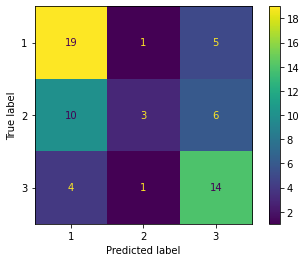

In [455]:
# Plot the predicted sale price versus the actual sale price
plot_confusion_matrix(gs, X_test, y_test);